### Importing Necessary Libraries

In [36]:
import re
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 

from sklearn.linear_model import(
    LinearRegression,
    ElasticNet,
    Lasso,
    Ridge
)

from sklearn.tree import(
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.metrics import(
    accuracy_score,
    roc_curve,
    root_mean_squared_error,
    mean_absolute_error,
    mean_squared_error,
    f1_score,
    classification_report,
    confusion_matrix,
    r2_score
)

from sklearn.preprocessing import(
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    LabelEncoder,
    LabelBinarizer
)

import warnings
warnings.filterwarnings('ignore')



In [37]:
os.getcwd()

'c:\\Users\\Dell\\Documents\\GEN_AI\\Data_Science\\Pandas\\Data_Analysis\\used_car_price_prediction'

In [38]:
os.makedirs('ML_MODEL',exist_ok=True)

In [39]:
path=os.path.join('Data_Sets','used_cars.csv')
path

'Data_Sets\\used_cars.csv'

In [40]:
df=pd.read_csv(path)

### Basic Inspection in Data

In [41]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
df.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"


In [42]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
FIAT               5
Lotus              4
Lucid  

In [43]:
list(df.columns)

['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [44]:
df.shape

(4009, 12)

In [45]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [46]:
df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [48]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"


In [49]:
df['milage']=df['milage'].str.replace('mi.','').str.replace(',','').astype(float)
df['milage'].head()

0    51000.0
1    34742.0
2    22372.0
3    88900.0
4     9835.0
Name: milage, dtype: float64

In [50]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [51]:
df['price']=df['price'].str.replace('$','').str.replace(',','').astype(float)
df['price'].dtype

dtype('float64')

In [52]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [53]:
df['Engine_Capacity']=df['engine'].str.extract(r'(\d+\.\d+L|\d+L|\d+\.\d+\s*Liter|\d\s*L|\d\s*Liter)')

In [54]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_Capacity
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7L
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8L
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5L
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0L


In [55]:
df['Engine_Capacity']=df['Engine_Capacity'].str.replace('Liter','').str.replace('L','').astype(float)

In [56]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_Capacity
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0


In [57]:
df['Horse_Power']=df['engine'].str.extract(r'(\d+\.\d+HP|\d+HP)')

In [58]:
df['Horse_Power']=df['Horse_Power'].str.replace('HP','').astype(float)

In [59]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_Capacity,Horse_Power
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN


In [60]:
df.drop(columns=['engine'],axis=1,inplace=True)

In [61]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Engine_Capacity,Horse_Power
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN


In [62]:
df['Accident_Status']=df['accident'].apply(lambda x:"NO" if x=="None reported" else "YES")

In [63]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Engine_Capacity,Horse_Power,Accident_Status
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0,YES
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN,YES
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN,NO
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0,NO
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN,NO


In [64]:
df.drop('accident',axis=1,inplace=True)

In [65]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,Engine_Capacity,Horse_Power,Accident_Status
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,Yes,10300.0,3.7,300.0,YES
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005.0,3.8,NaN,YES
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,NaN,54598.0,3.5,NaN,NO
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,Yes,15500.0,3.5,354.0,NO
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999.0,2.0,NaN,NO


In [66]:
df['Power_Density']=df['Horse_Power']/df['Engine_Capacity']
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,Engine_Capacity,Horse_Power,Accident_Status,Power_Density
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,Yes,10300.0,3.7,300.0,YES,81.081081
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005.0,3.8,NaN,YES,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,NaN,54598.0,3.5,NaN,NO,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,Yes,15500.0,3.5,354.0,NO,101.142857
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999.0,2.0,NaN,NO,NaN


In [67]:
df.isnull().sum()

brand                0
model                0
model_year           0
milage               0
fuel_type          170
transmission         0
ext_col              0
int_col              0
clean_title        596
price                0
Engine_Capacity    217
Horse_Power        808
Accident_Status      0
Power_Density      940
dtype: int64

In [68]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=(df[col].isnull().sum()/len(df)*100)
        missing_info[col]=round(missing_count,2)

print('The missing values in percentage')
for col,perc in missing_info.items():
    print(f'{col}:{perc}%')        

The missing values in percentage
fuel_type:4.24%
clean_title:14.87%
Engine_Capacity:5.41%
Horse_Power:20.15%
Power_Density:23.45%


In [69]:
numerical_columns=df.select_dtypes(include=['number','float32','float64','int32','int64']).columns
df[numerical_columns].head()

,model_year,milage,price,Engine_Capacity,Horse_Power,Power_Density
0,2013,51000.0,10300.0,3.7,300.0,81.081081
1,2021,34742.0,38005.0,3.8,NaN,NaN
2,2022,22372.0,54598.0,3.5,NaN,NaN
3,2015,88900.0,15500.0,3.5,354.0,101.142857
4,2021,9835.0,34999.0,2.0,NaN,NaN


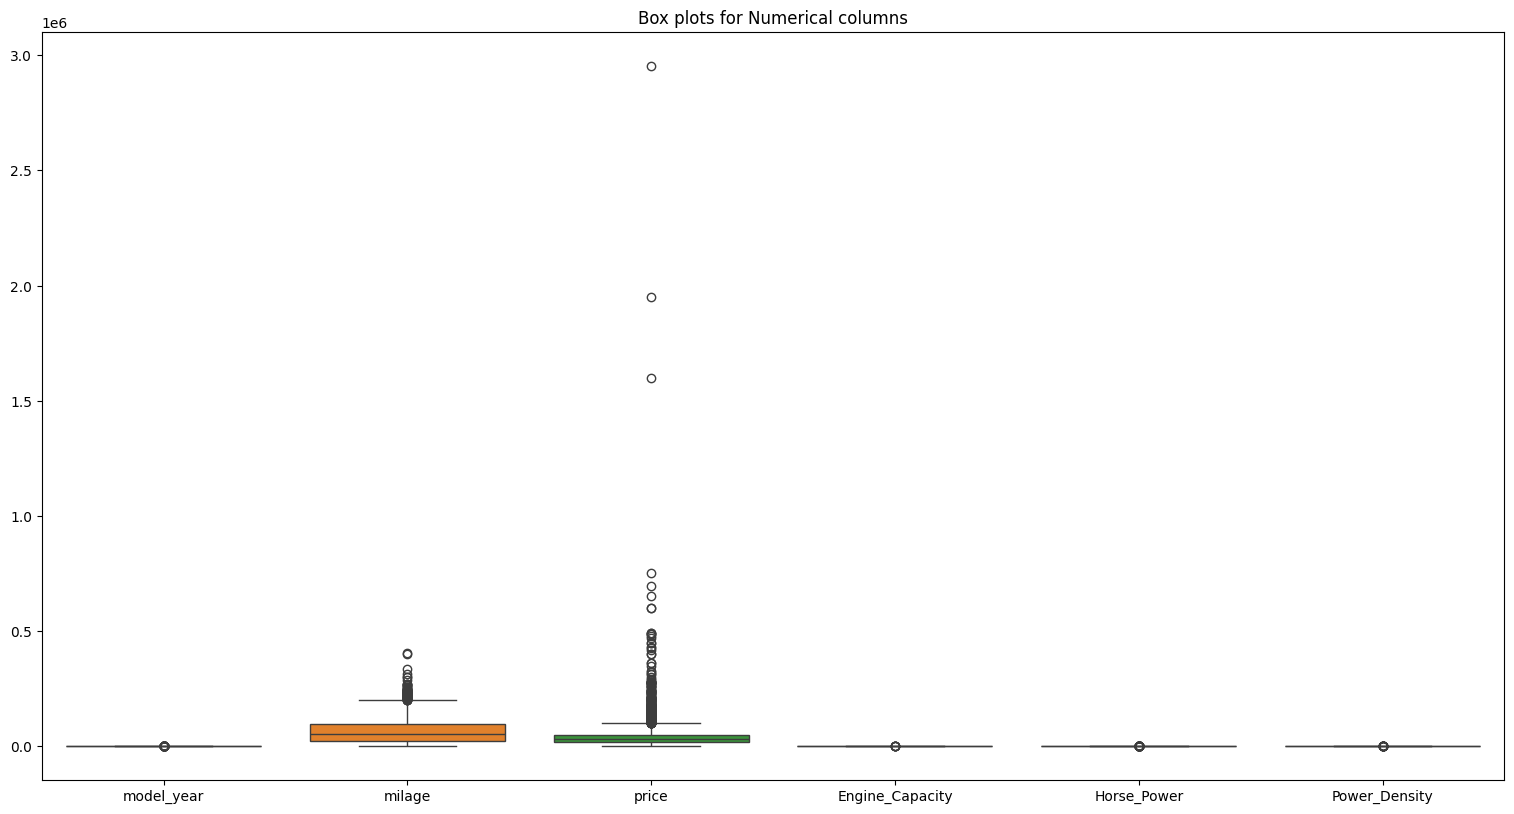

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

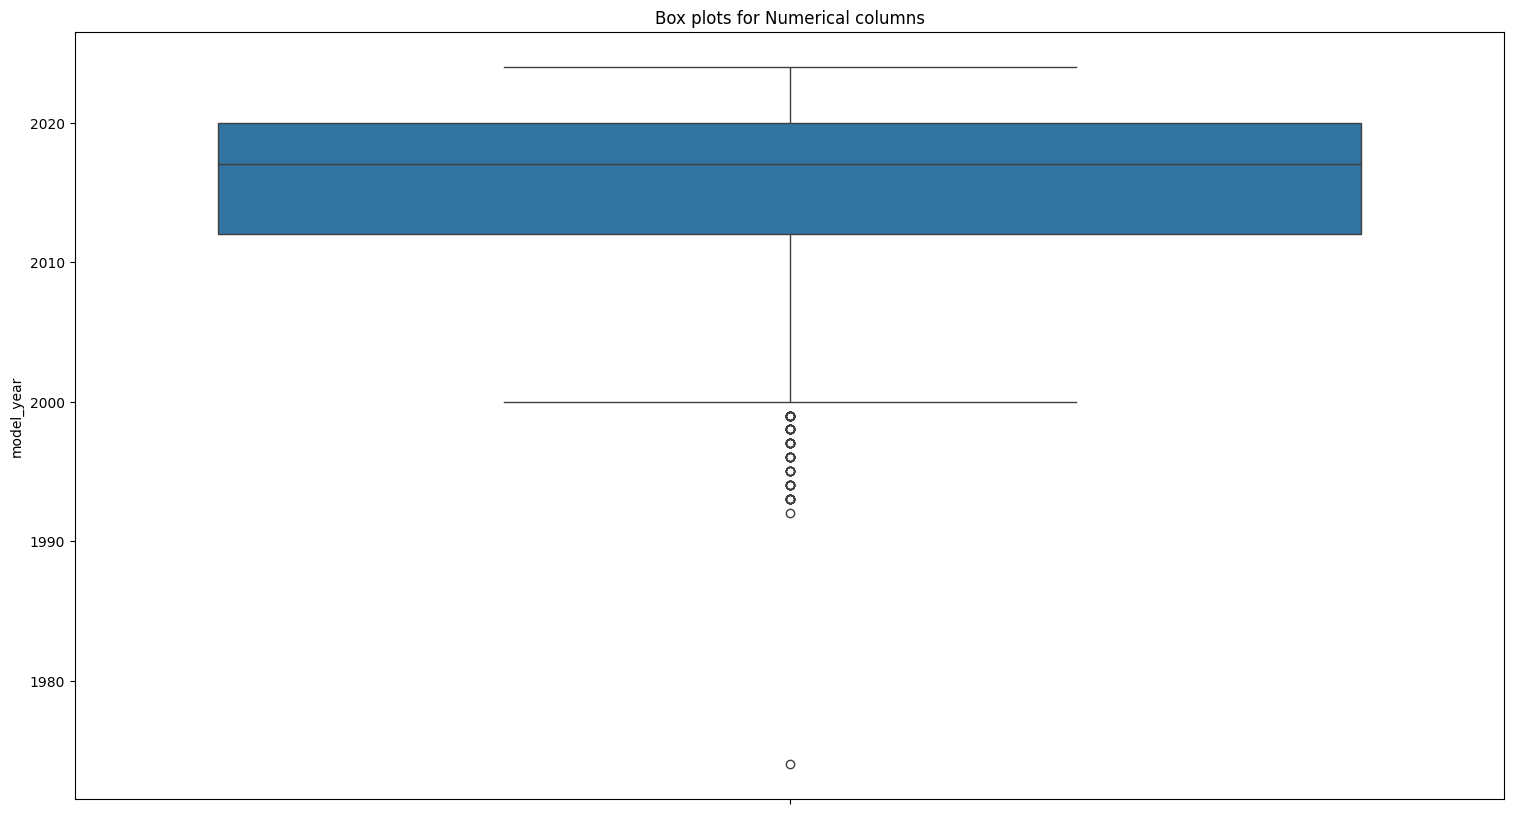

In [72]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['model_year'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

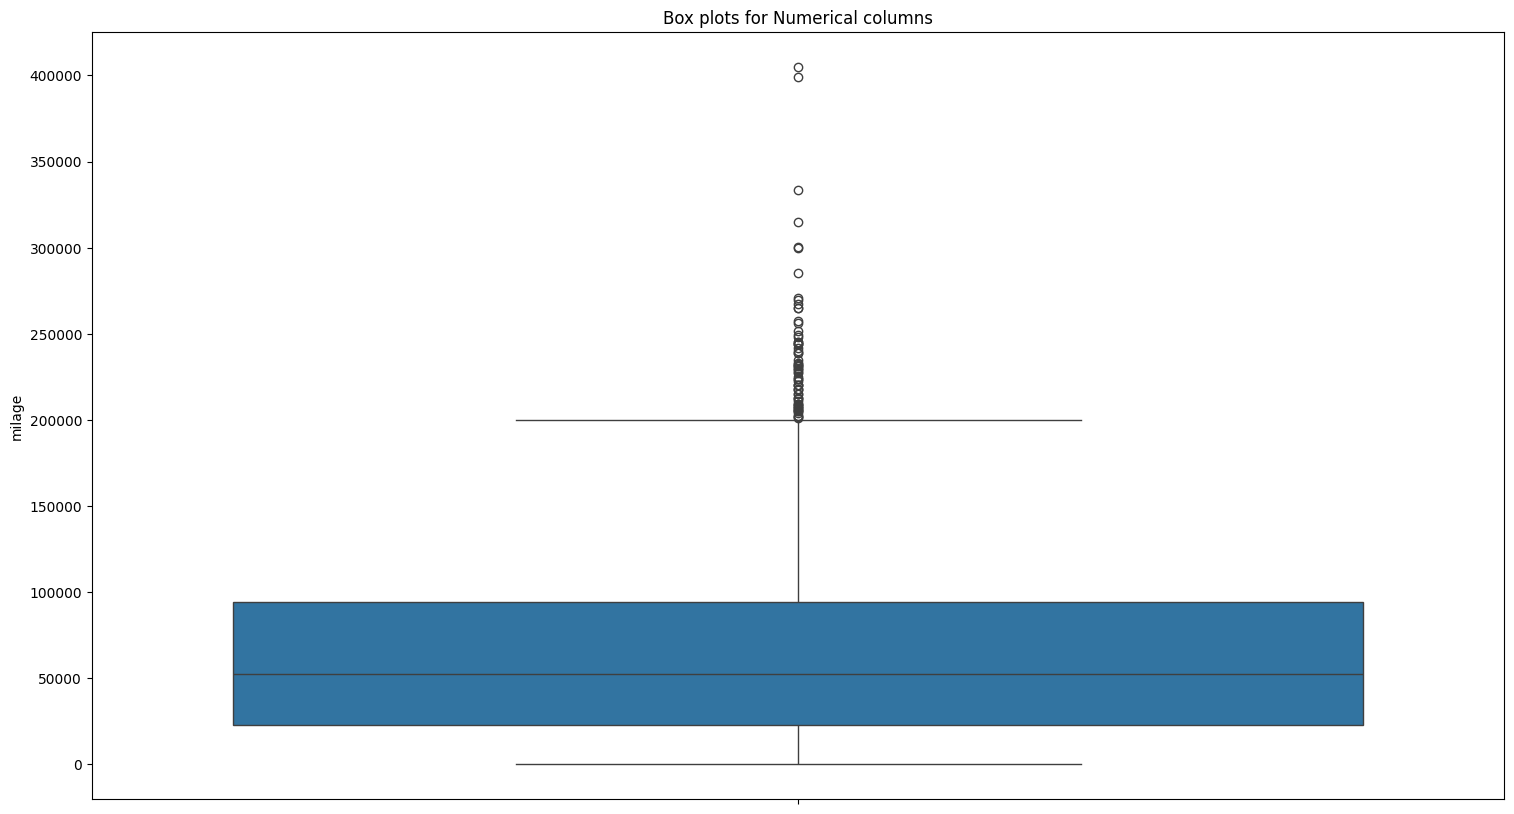

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['milage'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

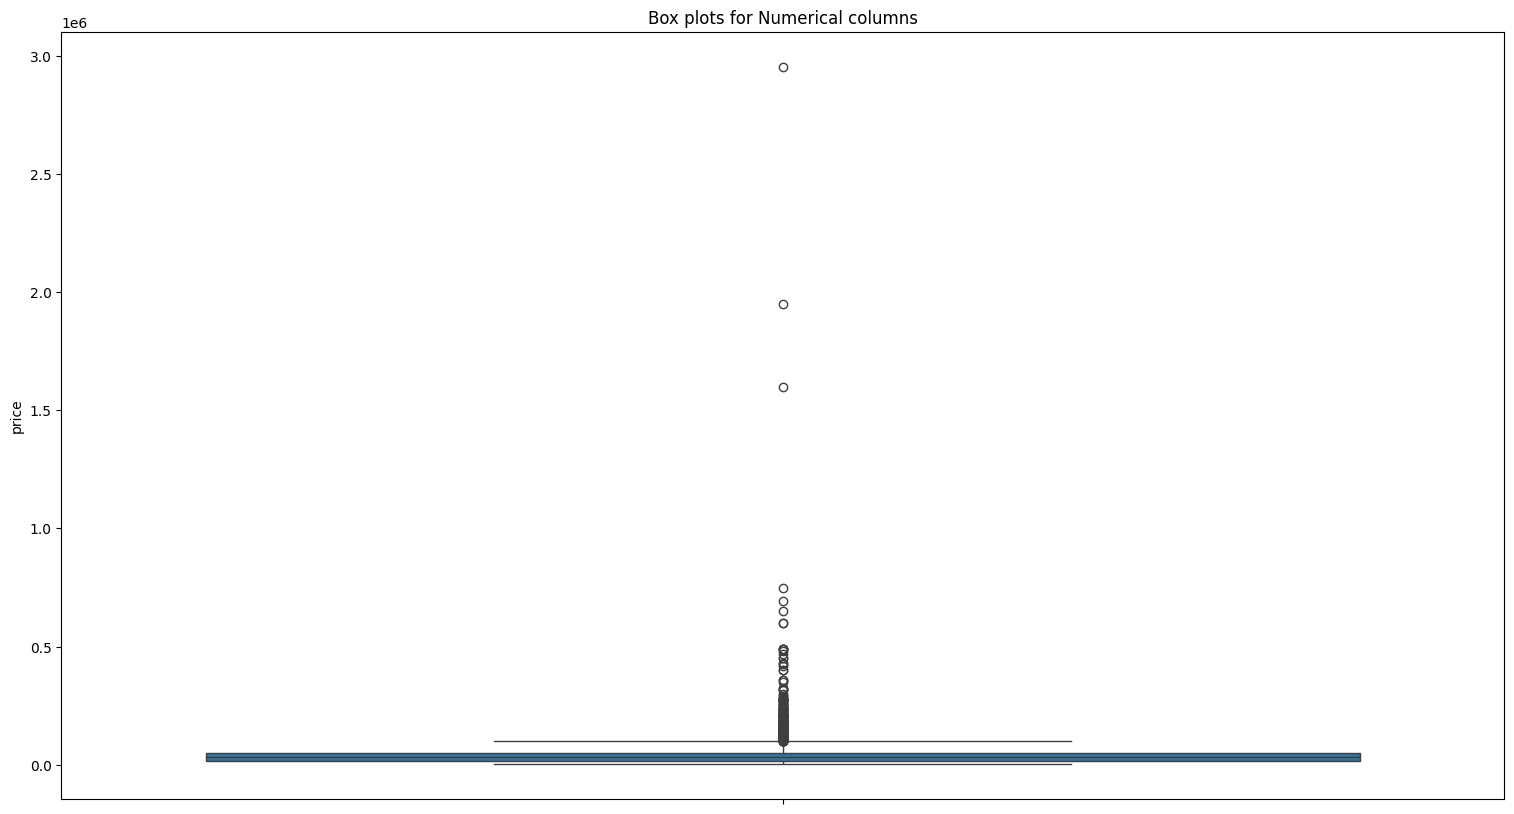

In [74]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['price'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

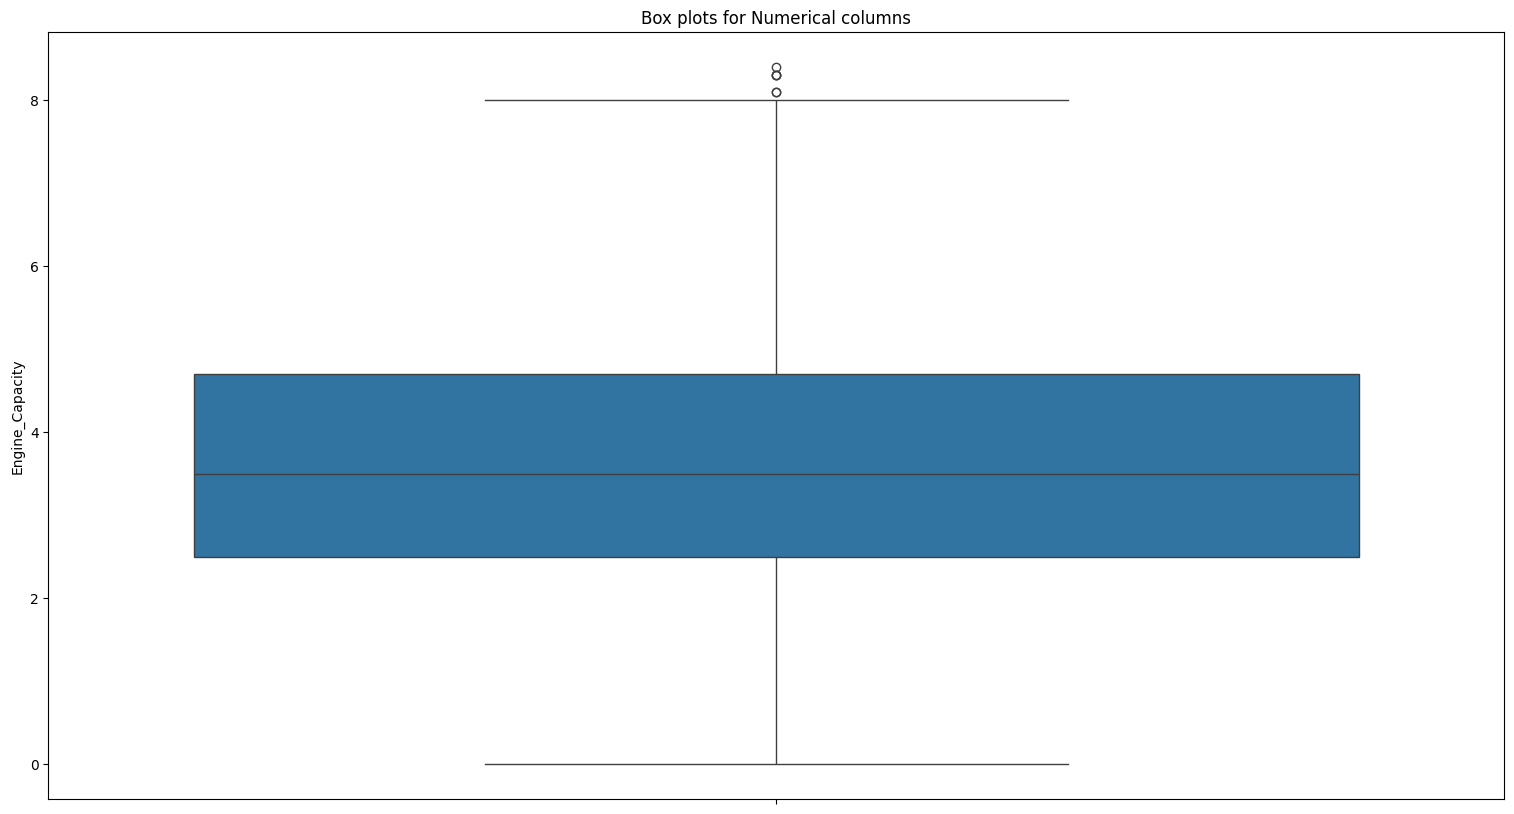

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['Engine_Capacity'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

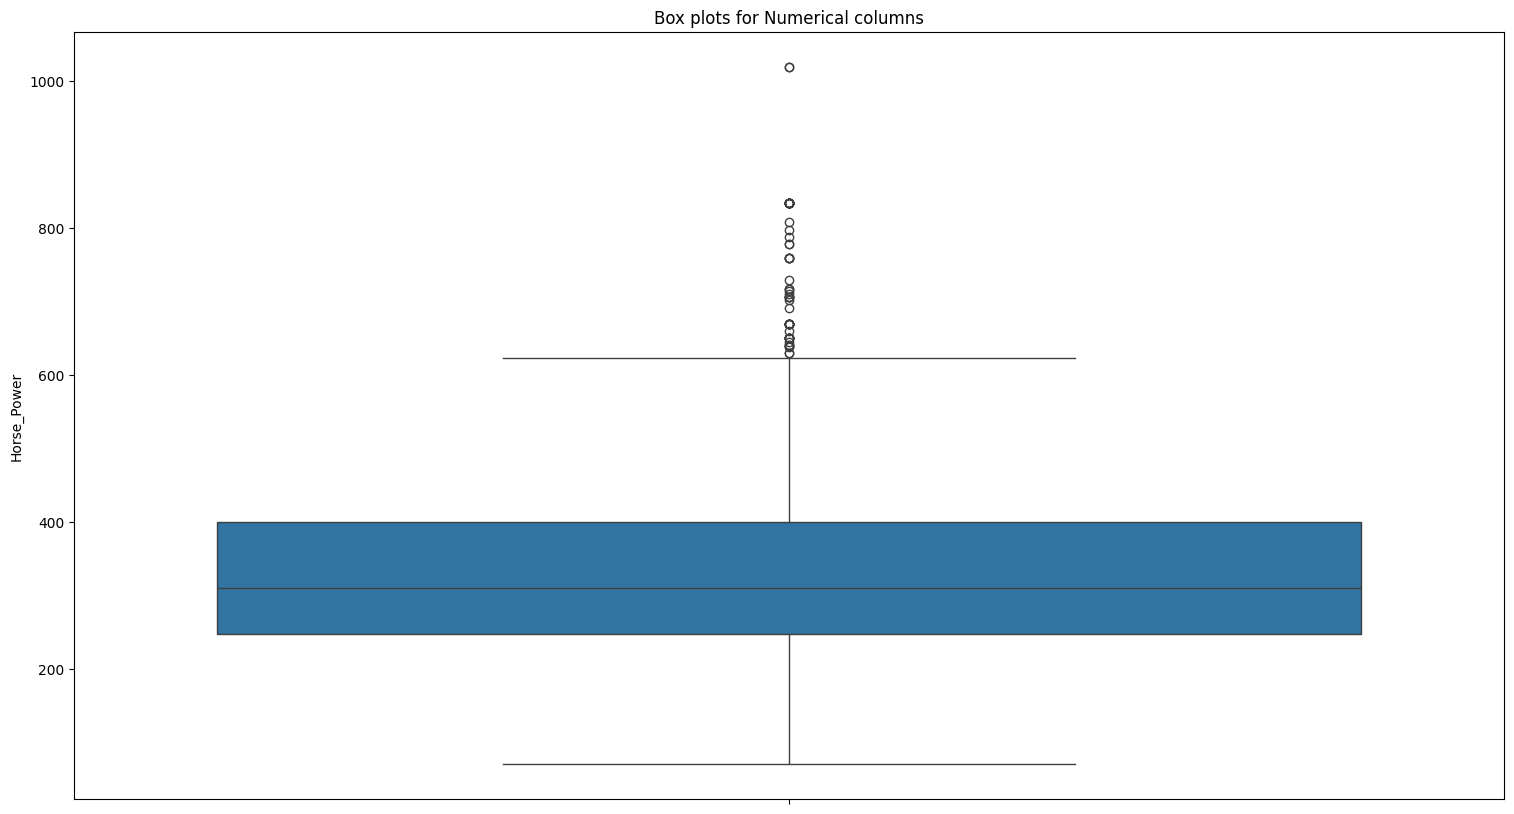

In [76]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['Horse_Power'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

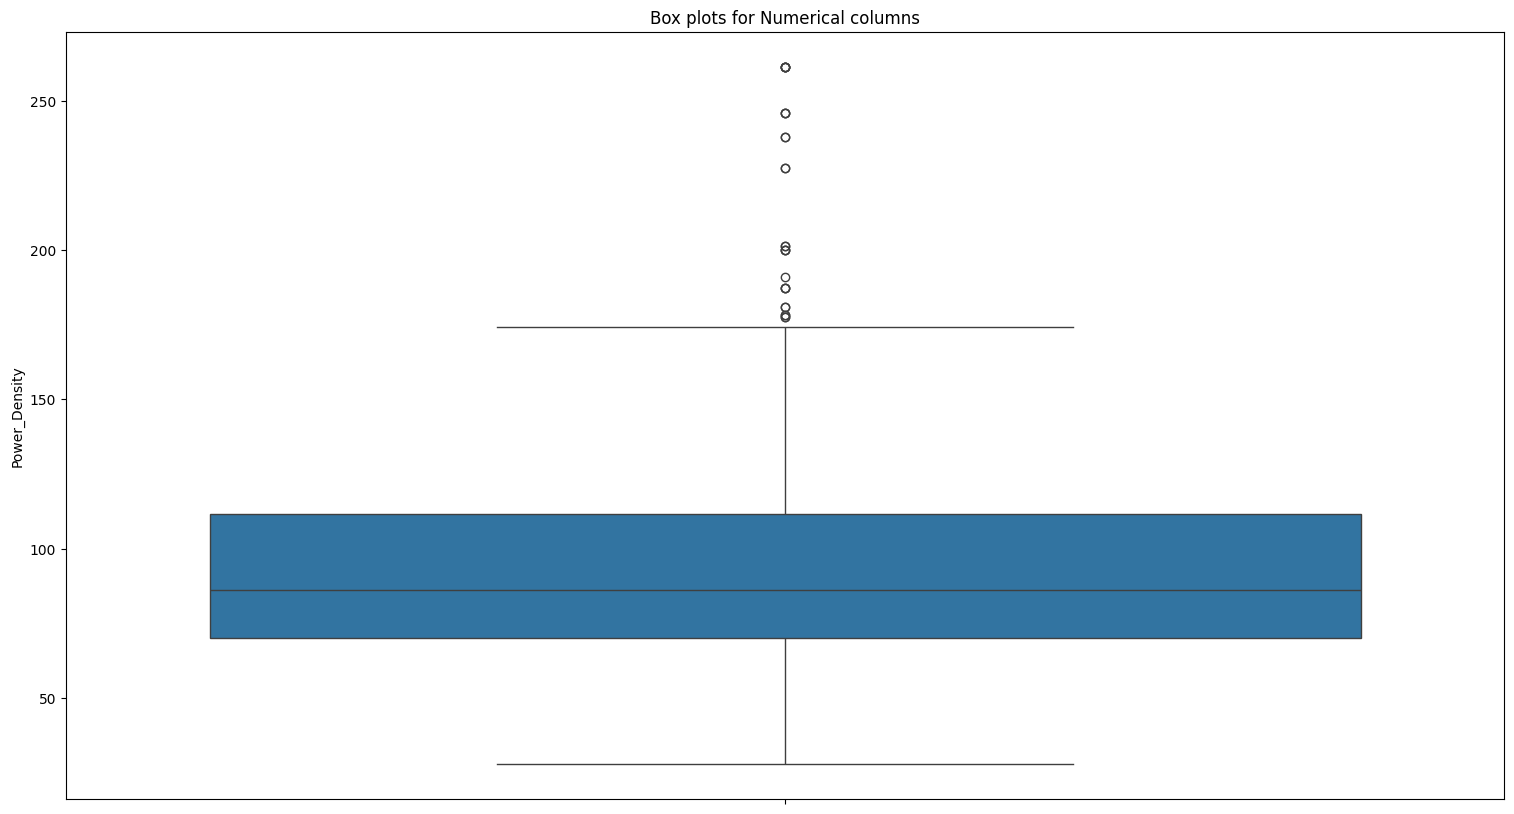

In [77]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df['Power_Density'])
plt.title('Box plots for Numerical columns')
plt.tight_layout(pad=0.2)
plt.show()

In [78]:
x=np.array([2,4,6,10])
y1=np.exp(x)+np.sin(x)
y2=np.sin(x**2)+np.exp(x)+np.log(x)
y3=np.atan(x)
y4=np.pi*x**3+np.cosh(x)
y5=np.sin(x)+np.cos(x)
y6=np.atan(x)+np.sinh(x)
y1,y2,y3,y4,y5,y6

(array([8.29835353e+00, 5.38413475e+01, 4.03149378e+02, 2.20259218e+04]),
 array([7.32540078e+00, 5.56965411e+01, 4.04228774e+02, 2.20282620e+04]),
 array([1.10714872, 1.32581766, 1.40564765, 1.47112767]),
 array([   28.89493692,   228.37016267,   880.2996493 , 14154.82557369]),
 array([ 0.49315059, -1.41044612,  0.68075479, -1.38309264]),
 array([4.73400913e+00, 2.86157349e+01, 2.03118805e+02, 1.10147040e+04]))

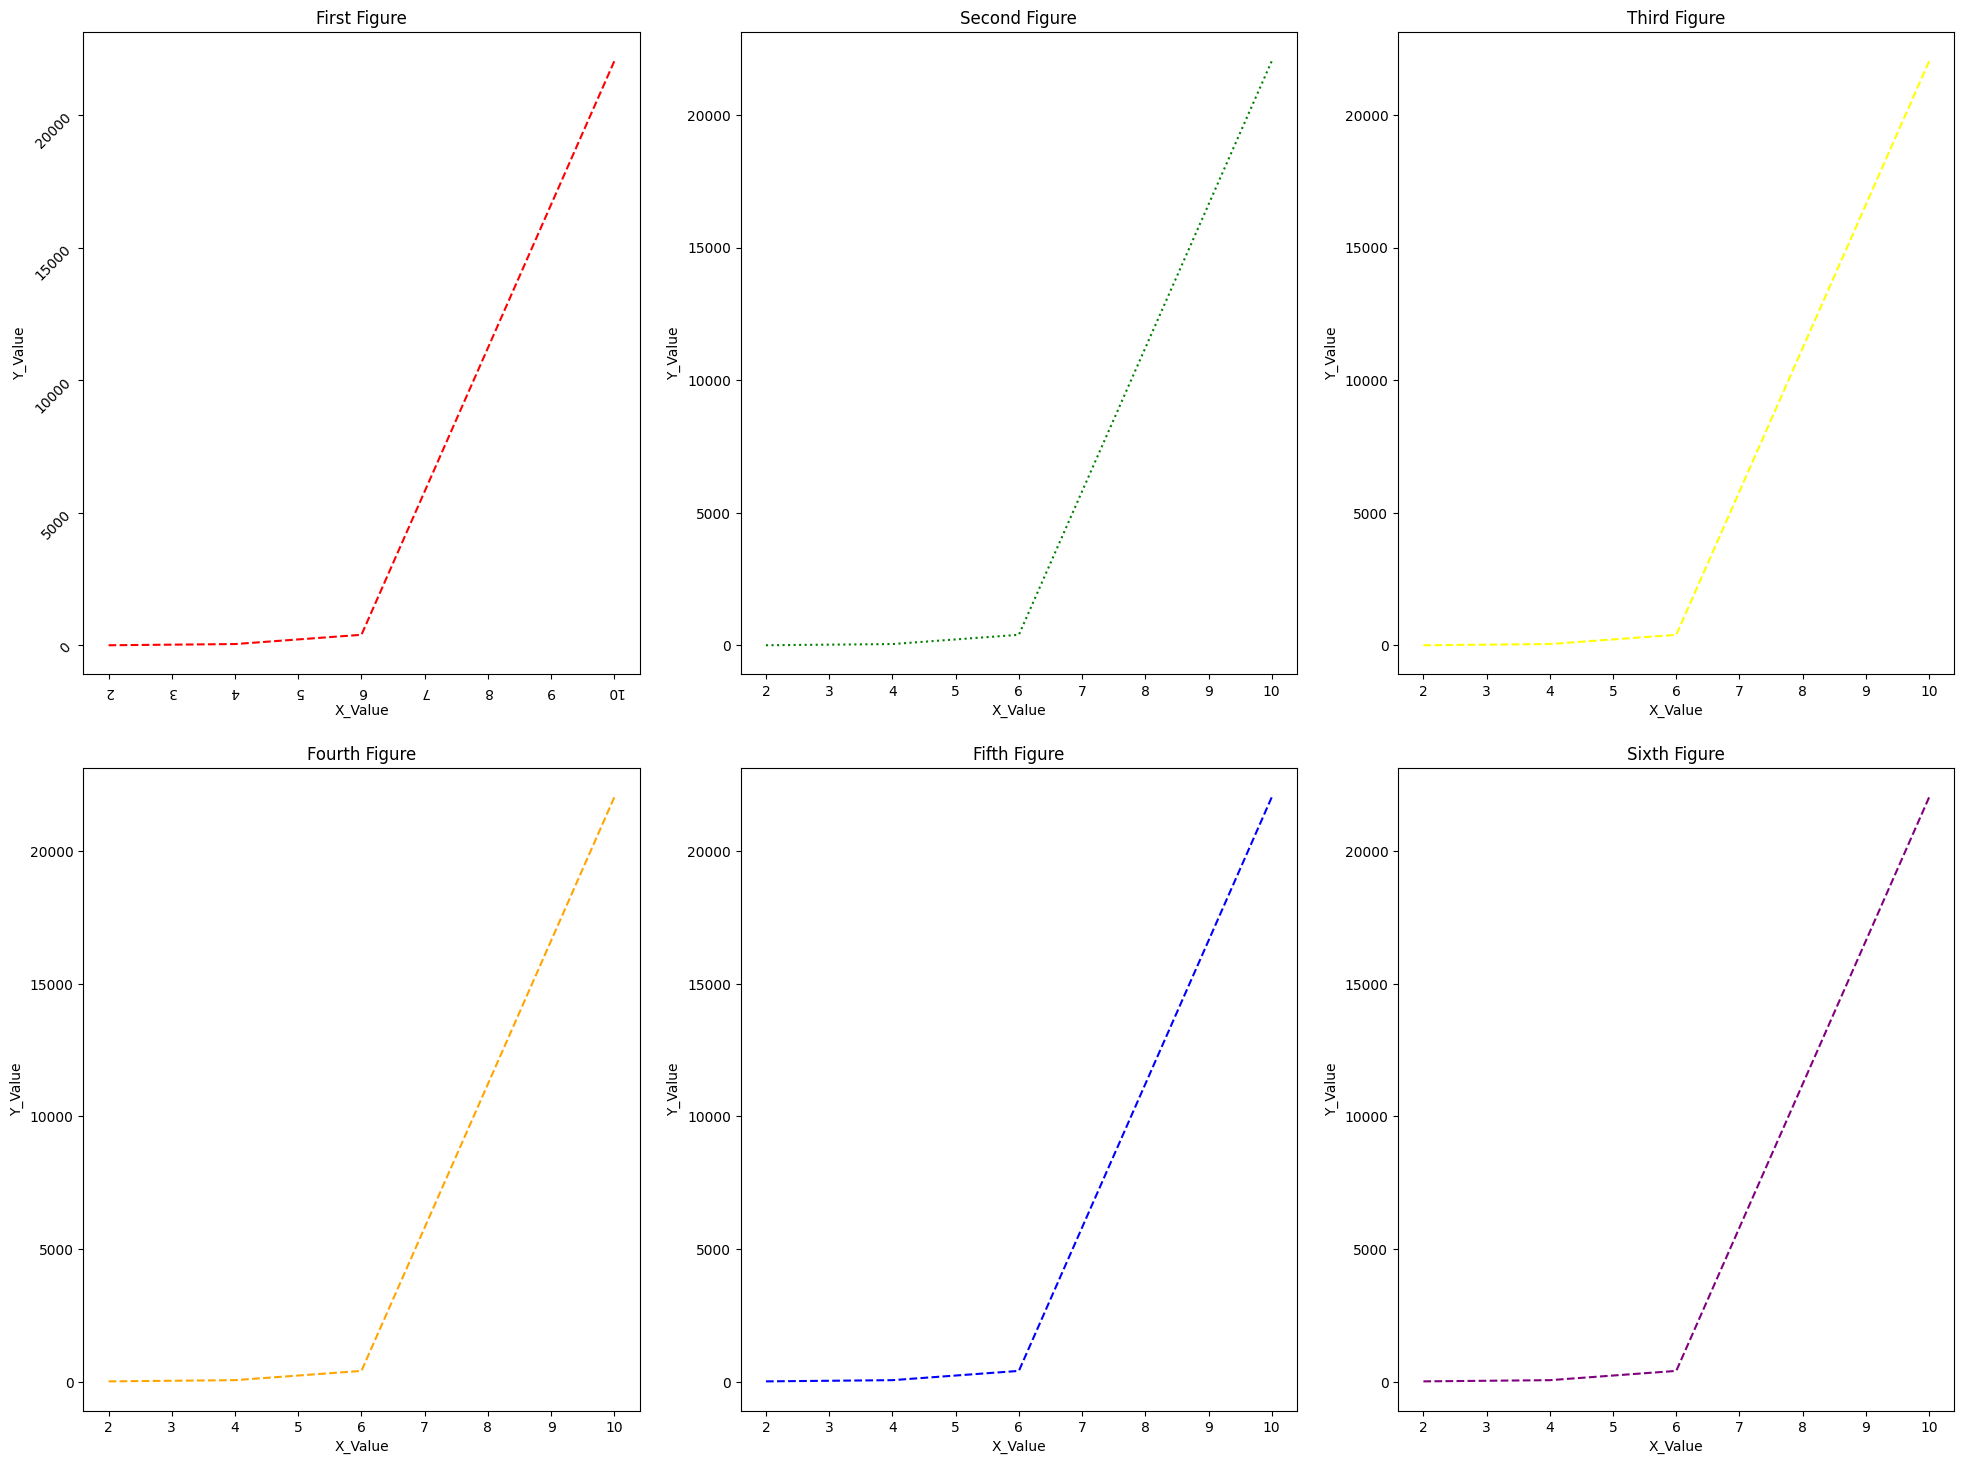

In [88]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.plot(x,y1,linestyle='--',linewidth=1.5,color='red')
plt.title('First Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')
plt.xticks(rotation=180)
plt.yticks(rotation=45)

plt.subplot(2,3,2)
plt.plot(x,y1,linestyle=':',linewidth=1.5,color='green')
plt.title('Second Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')

plt.subplot(2,3,3)
plt.plot(x,y1,linestyle='--',linewidth=1.5,color='yellow')
plt.title('Third Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')

plt.subplot(2,3,4)
plt.plot(x,y1,linestyle='--',linewidth=1.5,color='orange')
plt.title('Fourth Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')

plt.subplot(2,3,5)
plt.plot(x,y1,linestyle='--',linewidth=1.5,color='blue')
plt.title('Fifth Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')

plt.subplot(2,3,6)
plt.plot(x,y1,linestyle='--',linewidth=1.5,color='purple')
plt.title('Sixth Figure')
plt.xlabel('X_Value')
plt.ylabel('Y_Value')

plt.tight_layout(pad=2)
plt.savefig('Basic_Line_Plot.png',dpi=1000)

plt.show()

### Basic Scatter Plot

In [89]:
x=[10,20,30,40,50,60,70,80,90]
a=[8,1,7,2,0,3,7,3,2]

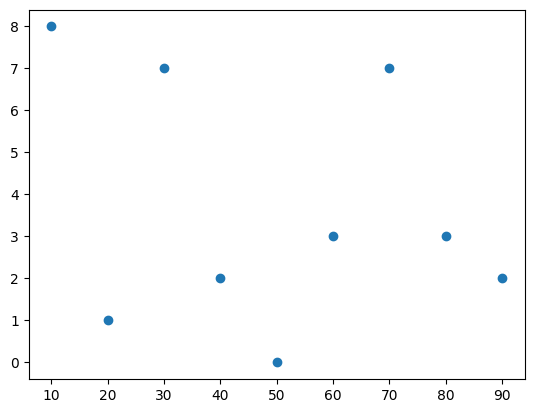

In [90]:
plt.scatter(x,a)
plt.show()

### Markers in the Scatter Plot

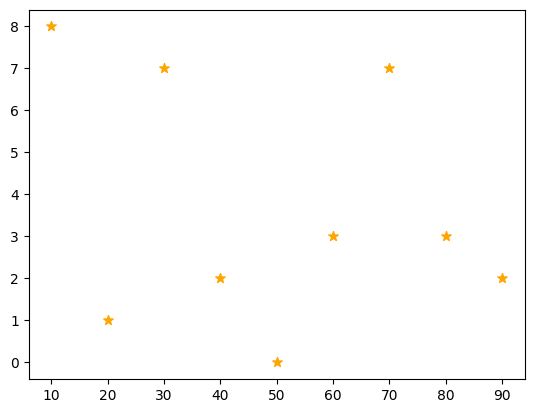

In [91]:
plt.scatter(x,a,marker="*",c="orange",s=50)
plt.show()

### Adding two Markers in same plot

In [92]:
z=[10,20,30,40,50,60,70,80,90]
x=[8,1,7,2,0,3,7,3,2]
y=[4,2,5,6,9,1,4,5,3]

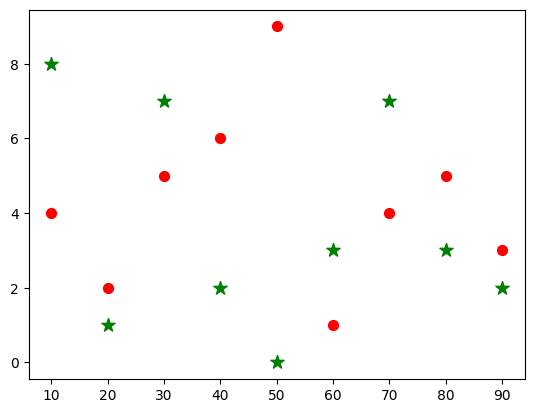

In [93]:
plt.scatter(z,x,marker="*",c="g",s=100)
plt.scatter(z,y,marker=".",c="r",s=200)
plt.show()

### Adding two subplots

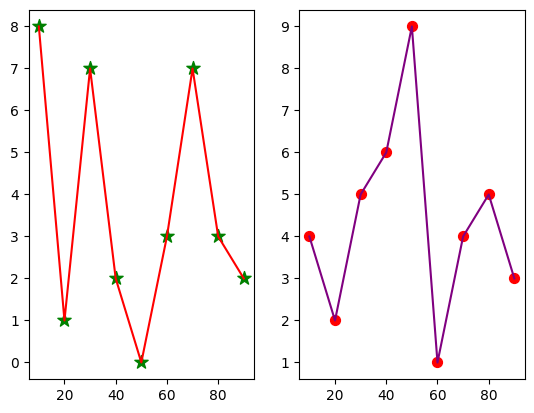

In [94]:
plt.subplot(1,2,1)
plt.plot(z,x,color='red')
plt.scatter(z,x,marker="*",c="g",s=100)

plt.subplot(1,2,2)
plt.plot(z,y,color='purple')
plt.scatter(z,y,marker=".",c="r",s=200)


In [ ]:
# pie chart

In [95]:
fruits={
    'Apple':20,
    'Papaya':10,
    'Mango':25,
    'Banana':15,
    'Tomato':20,
    'Strawberry':30,
    'Watermelon':2,
    'Kiwi':8,
    'DragonFruits':4,
    'Cherry':20
}

In [96]:
keys=list(fruits.keys())
keys

['Apple',
 'Papaya',
 'Mango',
 'Banana',
 'Tomato',
 'Strawberry',
 'Watermelon',
 'Kiwi',
 'DragonFruits',
 'Cherry']

In [97]:
values=list(fruits.values())
values

[20, 10, 25, 15, 20, 30, 2, 8, 4, 20]

In [101]:
color=['red','yellow','blue','orange','purple','pink','green','cyan','white','black']

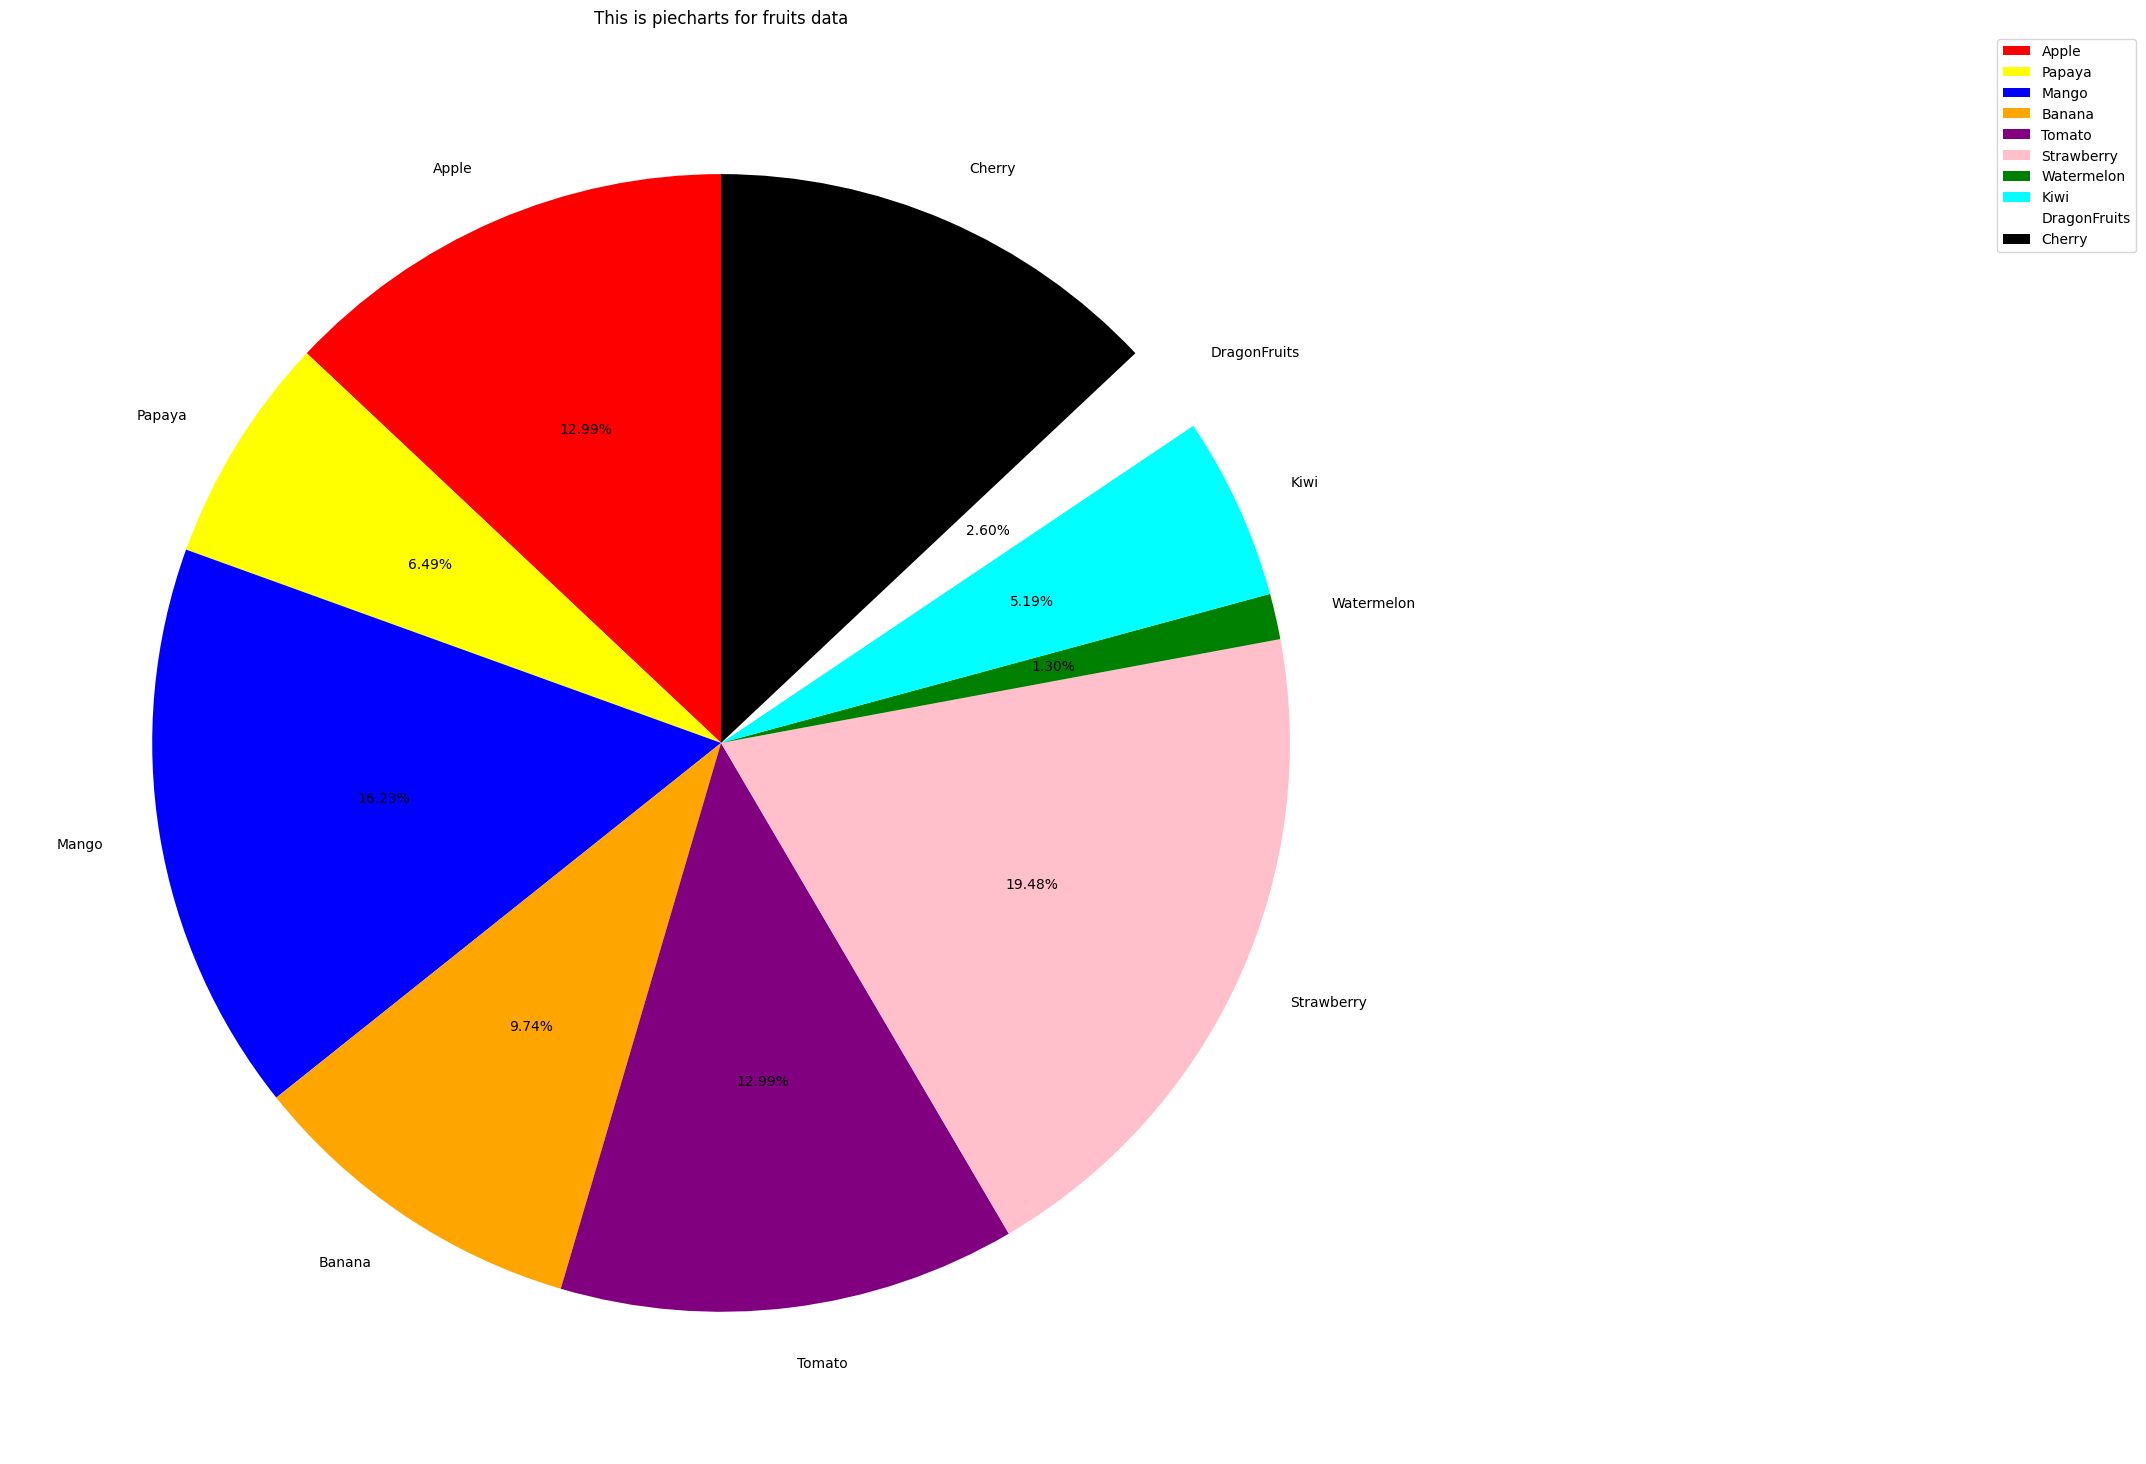

In [99]:
plt.figure(figsize=(20,15))

plt.pie(values,labels=keys,colors=color,autopct='%0.02f%%',startangle=90)
plt.title('This is piecharts for fruits data')

plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.tight_layout(pad=2)
plt.show()

### Making Histogram

In [102]:
iris_df=pd.read_csv('Data_Sets//IRIS.csv')

In [103]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


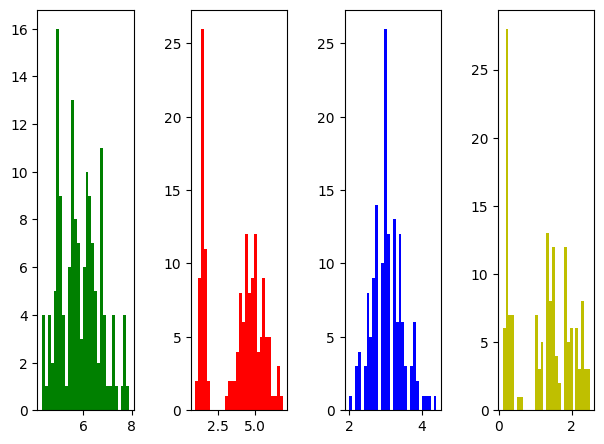

In [106]:
plt.Figure(figsize=(20,15))
plt.subplot(1,4,1)
plt.hist(iris_df['sepal_length'],bins=30,color="g")

plt.subplot(1,4,2)
plt.hist(iris_df['petal_length'],bins=30,color="r")

plt.subplot(1,4,3)
plt.hist(iris_df['sepal_width'],bins=30,color="b")

plt.subplot(1,4,4)
plt.hist(iris_df['petal_width'],bins=30,color="y")
plt.tight_layout(pad=2)
plt.show()